<a href="https://colab.research.google.com/github/SAK90/HousingPrices/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [118]:
fetch_housing_data()

In [119]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)


In [120]:
housing_data = load_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [121]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [122]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

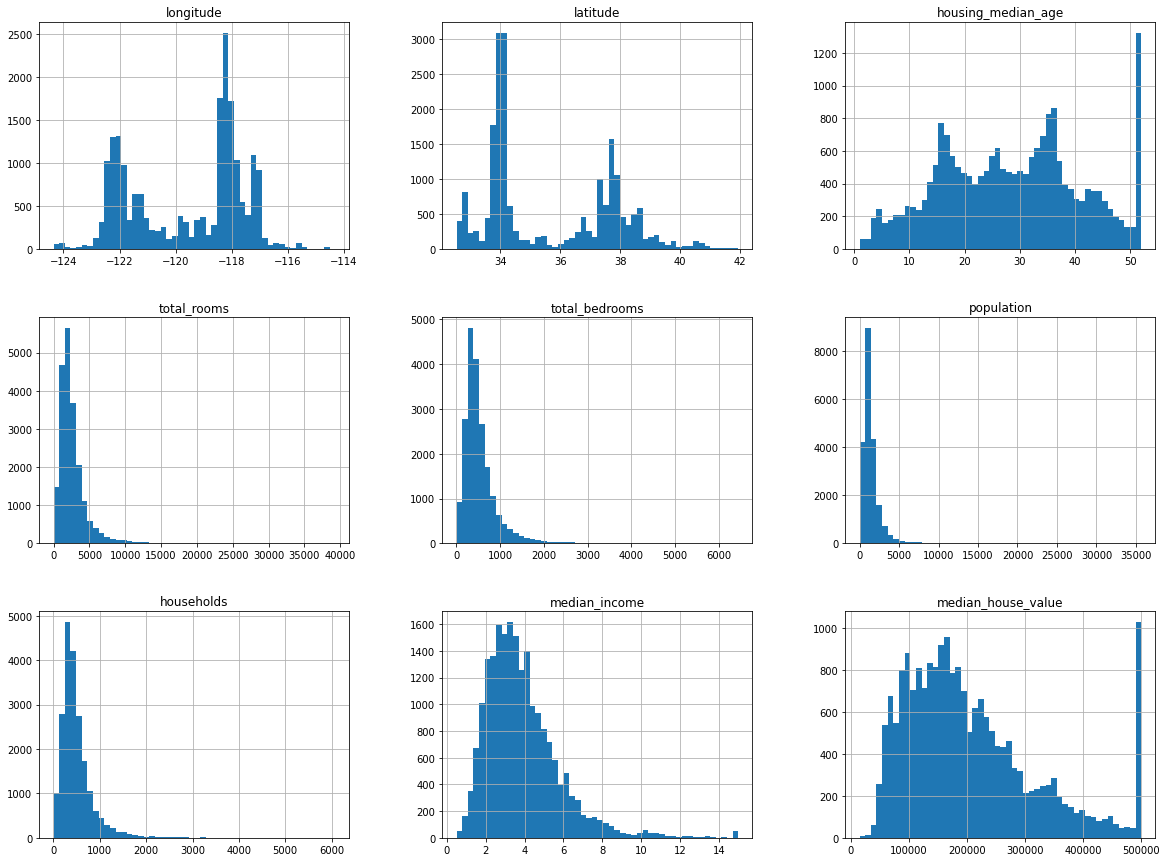

In [123]:
import matplotlib.pyplot as plt

housing_data.hist(bins = 50, figsize = (20, 15))
plt.show()

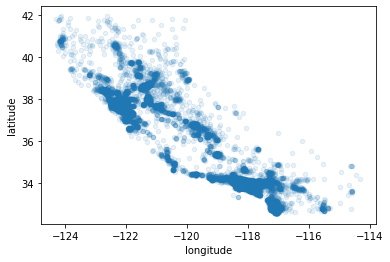

In [124]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

In [125]:
housing_data = load_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [126]:
correlation_matrix = housing_data.corr()
correlation_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

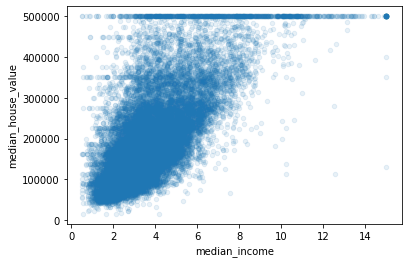

In [127]:
housing_data.plot(kind = "scatter", y = "median_house_value", x = "median_income", alpha = 0.1)
plt.show()

In [128]:
housing_data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [129]:
median = housing_data["total_bedrooms"].median()
housing_data["total_bedrooms"].fillna(median, inplace = True)

In [130]:
Y = housing_data.iloc[:, 8]
housing_data.drop("median_house_value", inplace = True, axis = 'columns')
housing_data.drop("ocean_proximity", inplace = True, axis = 'columns')
X = housing_data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15480, 8)
(5160, 8)
(15480,)
(5160,)


In [132]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
from sklearn.metrics import mean_squared_error
import numpy as np
X_train_prediction = lin_reg.predict(X_train)
lin_mean_square_error = mean_squared_error(X_train_prediction, Y_train)
lin_root_mean_square_error = np.sqrt(lin_mean_square_error)
print(lin_root_mean_square_error)

69415.01534370685


In [135]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [136]:
X_train_prediction_tree = dec_tree_reg.predict(X_train)
tree_mean_square_error = mean_squared_error(X_train_prediction_tree, Y_train)
tree_root_mean_square_error = np.sqrt(tree_mean_square_error)
print(tree_root_mean_square_error)

0.0


In [139]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [140]:
X_train_prediction_forest = forest_reg.predict(X_train)
forest_mean_square_error = mean_squared_error(X_train_prediction_forest, Y_train)
forest_root_mean_square_error = np.sqrt(forest_mean_square_error)
print(forest_root_mean_square_error)

18490.460395972503


In [143]:
def display_score(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [144]:
from sklearn.model_selection import cross_val_score
lin_reg_scores = cross_val_score(lin_reg, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_score(lin_reg_rmse_scores)

Scores: [67617.4966278  66853.37267134 75245.65792029 70780.72381907
 70037.45030327 67805.72079415 67036.55792996 68987.23535126
 71062.552622   70741.93397152]
Mean: 69616.87020106704
Standard deviation: 2419.4955491042138


In [145]:
dec_tree_scores = cross_val_score(dec_tree_reg, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
dec_tree_rmse_scores = np.sqrt(-dec_tree_scores)
display_score(dec_tree_rmse_scores)

Scores: [72457.19411654 68889.14351314 75765.04725948 66444.85350482
 67662.00170205 67414.30289485 67410.23531221 65348.41673038
 73559.01541096 67100.65213903]
Mean: 69205.08625834642
Standard deviation: 3292.3660994455367


In [146]:
forest_reg_scores = cross_val_score(forest_reg, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
display_score(forest_reg_rmse_scores)

Scores: [49068.31547402 49961.75773488 52284.48093356 49602.41438764
 48545.49034503 48416.67531231 47462.4664475  48096.26936806
 52795.11443871 49878.85990215]
Mean: 49611.184434386945
Standard deviation: 1650.6899297579719
